# Lecture 18

## This lecture

Continue introduce basic features and usage of the **pandas** library

## Time series

* Time series are a common form of data in which a quantity is given at regularly or irregularly timestamps (eg. stock prices, temperature recordings, etc.)
* `pandas` provides `DatetimeIndex` and `PeriodIndex` to carry out many common date, time, period and calender operations


In [1]:
# import module
import pandas as pd
# for some examples, we also need numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import datetime

In [3]:
pd.date_range("2019-12-1", periods=31)

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16',
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.date_range("2019-11-20 00:00", "2019-11-20 12:00", freq="H")

DatetimeIndex(['2019-11-20 00:00:00', '2019-11-20 01:00:00',
               '2019-11-20 02:00:00', '2019-11-20 03:00:00',
               '2019-11-20 04:00:00', '2019-11-20 05:00:00',
               '2019-11-20 06:00:00', '2019-11-20 07:00:00',
               '2019-11-20 08:00:00', '2019-11-20 09:00:00',
               '2019-11-20 10:00:00', '2019-11-20 11:00:00',
               '2019-11-20 12:00:00'],
              dtype='datetime64[ns]', freq='H')

The `date_range` function returns a DatetimeIndex object, which can be used as an index for a `Series` or `DataFrame` object

In [6]:
ts1 = pd.Series(np.arange(31))

In [7]:
ts1.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [8]:
ts1.index=pd.date_range("2019-11-20", periods=31)

In [9]:
ts1

2019-11-20     0
2019-11-21     1
2019-11-22     2
2019-11-23     3
2019-11-24     4
2019-11-25     5
2019-11-26     6
2019-11-27     7
2019-11-28     8
2019-11-29     9
2019-11-30    10
2019-12-01    11
2019-12-02    12
2019-12-03    13
2019-12-04    14
2019-12-05    15
2019-12-06    16
2019-12-07    17
2019-12-08    18
2019-12-09    19
2019-12-10    20
2019-12-11    21
2019-12-12    22
2019-12-13    23
2019-12-14    24
2019-12-15    25
2019-12-16    26
2019-12-17    27
2019-12-18    28
2019-12-19    29
2019-12-20    30
Freq: D, dtype: int64

In [10]:
ts1["2019-11-30"]

10

In [11]:
ts1.index[2]

Timestamp('2019-11-22 00:00:00', freq='D')

### Temperature time series example

In [12]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [13]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [14]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [15]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


The time in the raw data was represented in UNIX timestamp. We want to convert it to date and time object using `to_datetime`

In [16]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm')) # set unit:s, timezone 'Europe/Stockholm'

In [17]:
df1 = df1.set_index("time") # use time as index

In [18]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [19]:
df2 = df2.set_index("time")

In [20]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [21]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

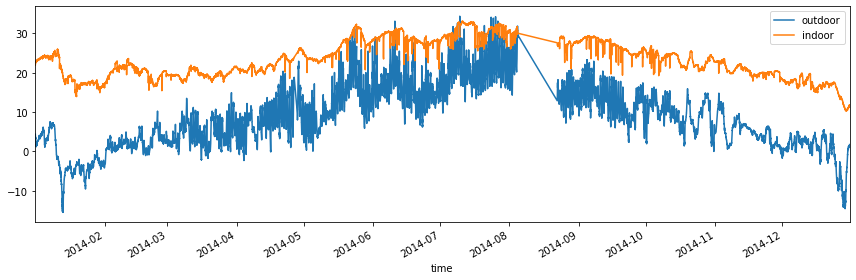

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
plt.show()


Display the info of the dataFrame object

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


**Select the data for January**

In [25]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [26]:
df1.index < "2014-2-1" # boolean index

array([ True,  True,  True, ..., False, False, False])

In [27]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [29]:
df2_jan = df2["2014-1-1":"2014-1-31"] # another way of selecting data

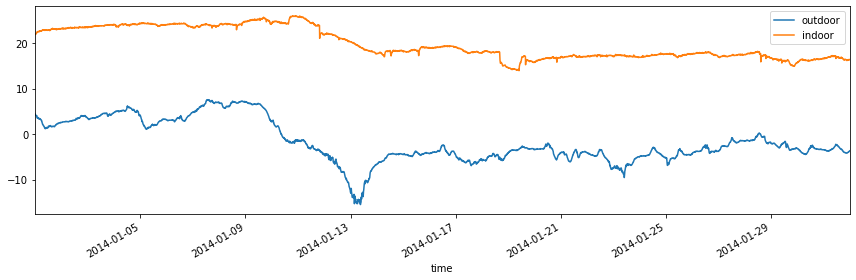

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()

plt.show()


### group by month

In [31]:
df1_month = df1.reset_index()

In [32]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [34]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [35]:
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [36]:
df2_month = df2.reset_index()

In [37]:
df2_month["month"] = df2_month.time.apply(lambda x: x.month)

In [38]:
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [39]:
df_month = df1_month.join(df2_month)

In [47]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [48]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

In [49]:
df_month.head(3)

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


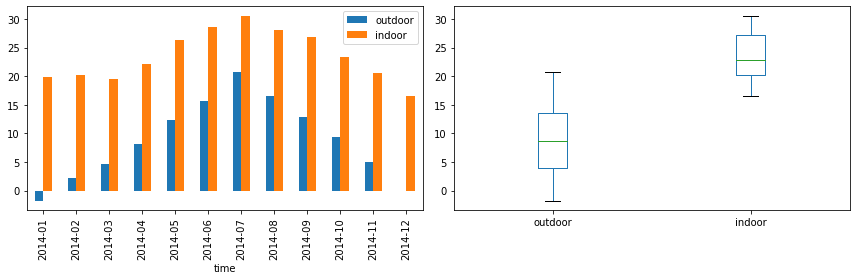

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
plt.show()

In [51]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [52]:
# resampling

In [53]:
df1_hour = df1.resample("H").mean()

In [54]:
df1_hour.columns = ["outdoor (hourly avg.)"]

In [55]:
df1_day = df1.resample("D").mean()

In [56]:
df1_day.columns = ["outdoor (daily avg.)"]

In [57]:
df1_week = df1.resample("7D").mean()

In [58]:
df1_week.columns = ["outdoor (weekly avg.)"]

In [59]:
df1_month = df1.resample("M").mean()

In [60]:
df1_month.columns = ["outdoor (monthly avg.)"]

In [65]:
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

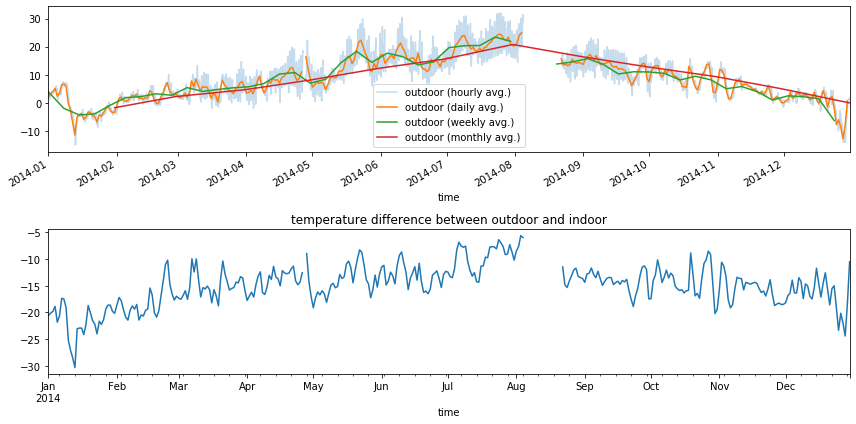

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()
plt.show()

In [70]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


## Selected day

In [71]:
df1_dec25 = df1[(df1.index < "2014-9-1") & (df1.index >= "2014-8-1")].resample("D")

In [73]:
df1_dec25 = df1.loc["2014-12-25"]

In [74]:
df1_dec25.head(5)

,outdoor
time,
2014-12-25 00:01:45+01:00,-4.88
2014-12-25 00:11:45+01:00,-4.94
2014-12-25 00:21:46+01:00,-5.06
2014-12-25 00:31:47+01:00,-5.06
2014-12-25 00:41:47+01:00,-5.12


In [75]:
df2_dec25 = df2.loc["2014-12-25"]

In [76]:
df2_dec25.head(5)

,indoor
time,
2014-12-25 00:01:45+01:00,16.31
2014-12-25 00:11:45+01:00,16.25
2014-12-25 00:21:46+01:00,16.31
2014-12-25 00:31:47+01:00,16.31
2014-12-25 00:41:47+01:00,16.25


In [78]:
df1_dec25.describe().T

,count,mean,std,min,25%,50%,75%,max
outdoor,144.0,-7.788819,1.456085,-10.06,-9.075,-7.75,-6.8625,-4.88


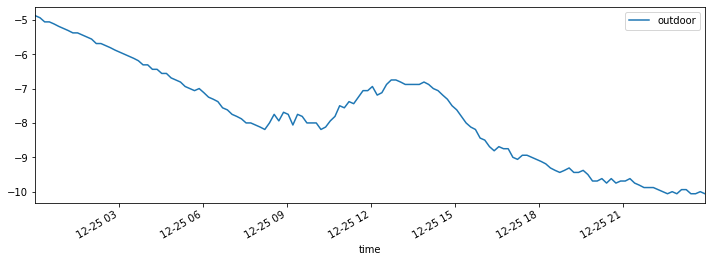

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_dec25.plot(ax=ax)
plt.show()



In [81]:
df1.index

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00',
               '2014-01-01 00:43:08+01:00', '2014-01-01 00:53:08+01:00',
               '2014-01-01 01:03:09+01:00', '2014-01-01 01:13:09+01:00',
               '2014-01-01 01:23:10+01:00', '2014-01-01 01:33:26+01:00',
               ...
               '2014-12-30 22:26:30+01:00', '2014-12-30 22:36:31+01:00',
               '2014-12-30 22:46:31+01:00', '2014-12-30 22:56:32+01:00',
               '2014-12-30 23:06:32+01:00', '2014-12-30 23:16:33+01:00',
               '2014-12-30 23:26:33+01:00', '2014-12-30 23:36:34+01:00',
               '2014-12-30 23:46:35+01:00', '2014-12-30 23:56:35+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', length=49548, freq=None)